# This notebook demixes simulated pdfs of M1 and M2 as defined in https://arxiv.org/abs/1911.09699

## Let's import everything and define the necessary functions

In [7]:
import os
import sys
import numpy as np 
import matplotlib as matplotlib
import matplotlib.pyplot as plt
WORK_DIR='../' #This is by default, it could be changed to an absolute directory

In [3]:
def find_nearest(array, value):
    #This function takes a list and value and yields the index of the list element closer to the value
        array = np.asarray(array)
        idx = (np.abs(array - value)).argmin()
        return idx
    
def find_nearest2d(array1,value1,array2,value2):
    #This function takes two vectors of length Nrow*Ncolumns meant to represent each possible pair of points in a 2d plane 
    #and yields the index of the pair closer to (value1,value2)
    if(len(array1)==len(array2)):
        auxarray=np.zeros(len(array1))
        for i in range(len(array1)):
            auxarray[i]=np.sqrt((array1[i]-value1)**2+(array2[i]-value2)**2)#asi parametrizo acercarme a los puntos que yo quiero
        indaux=find_nearest(auxarray,0.0)
        return indaux
    else:
        return 'Not same length'

def kplus(a,b):
    #I'll use this in the demixer, it's only a shorthand
    return float(a/b)
    #return float(a/b)+np.sqrt((float(a*np.sqrt(b)/(b*b)))*(float(a*np.sqrt(b)/(b*b)))+(float(np.sqrt(a)/b))*(float(np.sqrt(a)/b)))
def demixer(list1,list2):
    #This is the demixer function which yields [[t1, t2],[f1,f2]]
    if len(list1)==len(list2):
        k12=0
        kp=np.full(len(list1),1000.0)
        k21=0
        km=np.full(len(list1),1000.0)
        t1=np.full(len(list1),0.0)
        t2=np.full(len(list1),0.0)
        for i in range(len(list1)):
            if(list1[i]>0.001 and list2[i]>0.001):#Here I set a threshold to consider bins with sufficent statistic
                kp[i]=float(kplus(float(list1[i]),float(list2[i])))
                km[i]=kplus(list2[i],list1[i])
        k12=min(kp)
        k21=min(km)
        for i in range(len(list1)):
            t1[i]=float(1/(1-k12))*(list1[i]-k12*list2[i])
            t2[i]=float(1/(1-k21))*(list2[i]-k21*list1[i])
        f1s=float((1-k12)/(1-k12*k21))
        f2s=k21*f1s
        return ([t1,t2],[f1s,f2s])
    else:
        return 'Error'


## Let's import the files and get the Nj pdfs

5073
4823
687
3183
662
2705


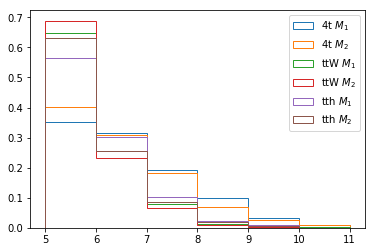

In [8]:
#Each file has one event per line and the line lists: 
#Nb Nj Nl p[l1][0] p[l1][1] p[l1][2] p[l1][3] .. p[lNl][0] p[lNl][1] p[lNl][2] p[lNl][3] -cont-
#p[b1][0] p[b1][1] p[b1][2] p[b1][3] .. p[bNb][0] p[bNb][1] p[bNb][2] p[bNb][3]
#p[j1][0] p[j1][1] p[j1][2] p[j1][3] .. p[jNj][0] p[jNj][1] p[jNj][2] p[jNj][3]
#HT MET

s1=open(WORK_DIR+'data/ttttm1ss.dat','r')
s2=open(WORK_DIR+'data/ttttm2ss.dat','r')
bw1=open(WORK_DIR+'data/ttwm1ss.dat','r')
bw2=open(WORK_DIR+'data/ttwm2ss.dat','r')
bh1=open(WORK_DIR+'data/tthm1ss.dat','r')
bh2=open(WORK_DIR+'data/tthm2ss.dat','r')

nmin = float(4.0)
ns1=[]
for line in s1:
    Line = line.split()
    if(float(Line[1])>nmin):
        ns1.append(float(Line[1]))
s1.close
ns2=[]
for line in s2:
    Line = line.split()
    if(float(Line[1])>nmin):
        ns2.append(float(Line[1]))

s2.close
nbw1=[]
for line in bw1:
    Line = line.split()
    if(float(Line[1])>nmin):
        nbw1.append(float(Line[1]))
bw1.close
nbw2=[]
for line in bw2:
    Line = line.split()
    if(float(Line[1])>nmin):
        nbw2.append(float(Line[1]))
bw2.close
nbh1=[]
for line in bh1:
    Line = line.split()
    if(float(Line[1])>nmin):
        nbh1.append(float(Line[1]))
bh1.close
nbh2=[]
for line in bh2:
    Line = line.split()
    if(float(Line[1])>nmin):
        nbh2.append(float(Line[1]))
bh2.close

bins=[5,6,7,8,9,10,11]
density=[[] for i in range(len([ns1,ns2,nbw1,nbw2,nbh1,nbh2]))]
binned=[[] for i in range(len([ns1,ns2,nbw1,nbw2,nbh1,nbh2]))]
pasda = [[] for i in range(len([ns1,ns2,nbw1,nbw2,nbh1,nbh2]))]
names=['4t $M_1$','4t $M_2$','ttW $M_1$','ttW $M_2$','tth $M_1$','tth $M_2$']
for i, f in enumerate([ns1,ns2,nbw1,nbw2,nbh1,nbh2]):
    print(len(f))
    density[i], binned[i], pasda[i] =plt.hist(f,density='True',histtype='step',bins=bins, label = names[i])
plt.legend(loc='upper right')
plt.show()

## Let's define the mixed samples pdfs

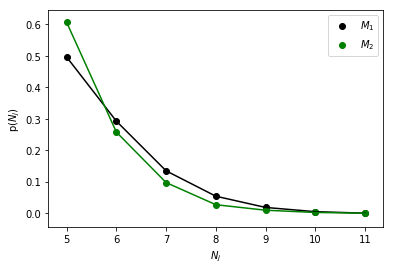

In [19]:
f1s =float(0.45)#The fractions are meant to match the expected events yields reported in arxiv.org/abs/1908.06463
f2s=float(0.22)

s0=density[0]
s1=density[1]
densitybackground1=[float(0.33/0.55)*density[2][i]+float(0.22/0.55)*density[4][i] for i in range(len(density[0]))]
densitybackground2=[float(0.45/0.78)*density[3][i]+float(0.33/0.78)*density[5][i] for i in range(len(density[0]))]
nm1=[f1s*s0[i]+(1-f1s)*densitybackground1[i] for i in range(len(s0))]
nm2=[f2s*s1[i]+(1-f2s)*densitybackground2[i] for i in range(len(s0))]

#To force the underlying distributions to be the same, uncomment the following lines

#s0=density[0]
#s1=density[0]
#densitybackground1=[float(0.33/0.55)*density[2][i]+float(0.22/0.55)*density[4][i] for i in range(len(s0))]
#densitybackground2=densitybackground1
#nm1=[f1s*s0[i]+(1-f1s)*densitybackground1[i] for i in range(len(s0))]
#nm2=[f2s*s1[i]+(1-f2s)*densitybackground2[i] for i in range(len(s0))]

plt.scatter(binned[0],np.append(nm1,0),color='black', label='$M_1$')
plt.plot(binned[0],np.append(nm1,0),color='black', linestyle='-')
plt.scatter(binned[0],np.append(nm2,0),color='green',label='$M_2$')
plt.plot(binned[0],np.append(nm2,0),color='green')
plt.xlabel('$N_{j}$')
plt.ylabel(r'p($N_{j}$)')
plt.legend(loc='upper right')
plt.show()

## Let's do the proper demixing

took 0.00098228 seconds to process
(1-f1r)/(1-f2r) 0.81818086 (1-f1t)/(1-f2t) 0.70512821
f2r/f1r 0.47509268 f2t/f1t 0.48888889


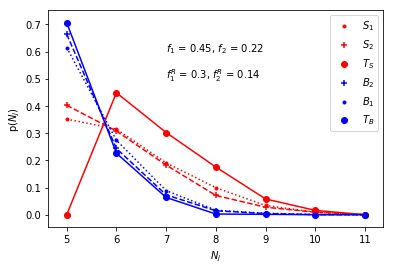

In [20]:
import time

start = time.time()
demix0=demixer(nm1,nm2)[0][0]
demix1=demixer(nm1,nm2)[0][1]
f1 = demixer(nm1,nm2)[1][0]
f2 = demixer(nm1,nm2)[1][1]
end = time.time()
delta = end - start
print("took %.8f seconds to process" % delta)

print('(1-f1r)/(1-f2r) %8.8f (1-f1t)/(1-f2t) %8.8f'%((1-f1)/(1-f2),(1-f1s)/(1-f2s)))#measures how good was the anchor bin used to obtain pT1
print('f2r/f1r %8.8f f2t/f1t %8.8f'%(f2/f1,f2s/f1s))#measures how good was the anchor bin used to obtain pT2
f1sr = round(f1s,2)
f2sr = round(f2s,2)
f1r = round(f1,2)
f2r=round(f2,2)
plt.text(7, 0.6, '$f_1$ = '+str(f1sr)+', $f_2$ = '+ str(f2sr))
plt.text(7, 0.5, '$f^{R}_1$ = '+str(f1r)+', $f^{R}_2$ = '+ str(f2r))
plt.scatter(binned[0],np.append(s0,0),marker='.',color='red',label='$S_{1}$')
plt.plot(binned[0],np.append(s0,0),color='red', linestyle=':')
plt.scatter(binned[0],np.append(s1,0),color='red', marker='+',label='$S_{2}$')
plt.plot(binned[0],np.append(s1,0),color='red', linestyle='--')
plt.scatter(binned[0],np.append(demix0,0),marker='o',color='red',label='$T_{S}$')
plt.plot(binned[0],np.append(demix0,0),color='red', linestyle='-')
plt.scatter(binned[0],np.append(densitybackground2,0),color='blue',marker='+',label='$B_{2}$')
plt.plot(binned[0],np.append(densitybackground2,0),color='blue',linestyle='--')
plt.scatter(binned[0],np.append(densitybackground1,0),color='blue',marker='.',label='$B_{1}$')
plt.plot(binned[0],np.append(densitybackground1,0),color='blue',linestyle=':')
plt.scatter(binned[0],np.append(demix1,0),color='blue', label='$T_{B}$')
plt.plot(binned[0],np.append(demix1,0),color='blue', linestyle='-')
plt.xlabel('$N_{j}$')
plt.ylabel(r'p($N_{j}$)')
plt.legend(loc='upper right')
plt.show()

## Let's do the 2d Ks plots

In [21]:
#Here I'll get the truth level Ks for each sample (H2 is assumed to be untrue)
kp=np.full(len(s0),1000.0)
km=np.full(len(s0),1000.0)
for i in range(len(s0)):
    if(densitybackground1[i]>0.001):
        kp[i]=kplus(s0[i],densitybackground1[i])
    if(s0[i]>0.001):
        km[i]=kplus(densitybackground1[i],s0[i])

k12=min(kp)
k21=min(km)

kp2=np.full(len(s1),1000.0)
km2=np.full(len(s1),1000.0)
for i in range(len(s1)):
    if(densitybackground1[i]>0.006):
        kp2[i]=kplus(s1[i],densitybackground2[i])
    if(s1[i]>0.006):
        km2[i]=kplus(densitybackground2[i],s1[i])
        
k12_2=min(kp2)
k21_2=min(km2)


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  if sys.path[0] == '':


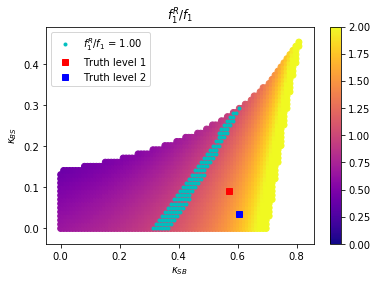

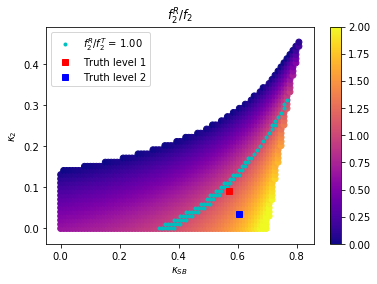

In [22]:
num=100 #This is the number of points we'll use
kest1 = np.linspace(0.0,1.0,num=num)
kest2 = np.linspace(0.0,1.0,num=num)
MATRIX=np.zeros((4,num*num))#Here are the matrices that we'll fill with kSB,kBS,f1R/f1,f2R/f2
MATRIX2=np.zeros((num,num))#Here I'll save the points close to f1R/f1=1
MATRIX3=np.zeros((num,num))#Here I'll save the points close to f2R/f2=1

for j in range(num):
    for i in range(num):
        MATRIX[0][j+i*num]=kest1[i]
        MATRIX[1][j+i*num]=kest2[j]
        if(kest1[i]*kest2[i]!=1 and kest1[i]>max((kest2[j]-f1)/((1-f1)*kest2[j]),(kest2[j]-f2)/((1-f2)*kest2[j])) and kest1[i]<min((1-f1)/(1-f1*kest2[j]),(1-f2)/(1-f2*kest2[j]))):
            #these criteria are analytical
            MATRIX[2][j+i*num]=(f1*(1-kest1[i]*kest2[j])-(1-kest1[i])*kest2[j])/(f1s*(1-kest1[i])*(1-kest2[j]))
            MATRIX[3][j+i*num]=(f2*(1-kest1[i]*kest2[j])-(1-kest1[i])*kest2[j])/(f2s*(1-kest1[i])*(1-kest2[j]))
            if(0.95<=MATRIX[2][j+i*num]<=1.05):
                MATRIX2[j][i]+=1.0
            if(0.95<=MATRIX[3][j+i*num]<=1.05):
                MATRIX3[j][i]+=1.0
        else:
            MATRIX[2][j+i*100]=None
            MATRIX[3][j+i*100]=None

[row1, col1] = np.where(MATRIX2==1.0)
[row2, col2] = np.where(MATRIX3==1.0)

plt.scatter(MATRIX[0],MATRIX[1],c=MATRIX[2],cmap='plasma',vmin=0.0,vmax=2.0)
plt.plot(kest1[col1],kest2[row1],'.',color='c',label='$f^{R}_{1}$/$f_{1}$ = 1.00')
plt.colorbar()
plt.xlabel(r'$\kappa_{SB}$')
plt.ylabel(r'$\kappa_{BS}$')
plt.plot(k12, k21, 's',color='red',label=r'Truth level 1')
plt.plot(k12_2, k21_2, 's',color='blue',label=r'Truth level 2')
plt.title(r'$f^{R}_{1}$/$f_{1}$')
plt.legend(loc='upper left')
plt.show()

plt.scatter(MATRIX[0],MATRIX[1],c=MATRIX[3],cmap='plasma',vmin=0.0,vmax=2.0)
plt.plot(kest1[col2],kest2[row2],'.',color='c',label='$f^{R}_{2}$/$f^{T}_{2}$ = 1.00')
plt.colorbar()
plt.xlabel(r'$\kappa_{SB}$')
plt.plot(k12, k21, 's',color='red',label='Truth level 1')
plt.plot(k12_2, k21_2, 's',color='blue',label=r'Truth level 2')
plt.ylabel(r'$\kappa_{2}$')
plt.title('$f^{R}_{2}$/$f_{2}$')
plt.legend(loc='upper left')

## Let's plot the topic distributions for the different K's

In [23]:
x = np.linspace(0.0,min(1-f1,1-f2),100)
ind1=find_nearest(x,(1-f1)*0.25)
f1r1=round(float(f1/((1-x[ind1]))),2)
f2r1=round(float(f2/((1-x[ind1]))),2)
nK1=[(1-x[ind1])*demix0[i]+x[ind1]*demix1[i] for i in range(len(demix0))]
ind2=find_nearest(x,(1-f1)*0.5)
f1r2=round(float(f1/((1-x[ind2]))),2)
f2r2=round(float(f2/((1-x[ind2]))),2)
nK2=[(1-x[ind2])*demix0[i]+x[ind2]*demix1[i] for i in range(len(demix0))]
ind3=find_nearest(x,(1-f1)*0.75)
f1r3=round(float(f1/((1-x[ind3]))),2)
f2r3=round(float(f2/((1-x[ind3]))),2)
nK3=[(1-x[ind3])*demix0[i]+x[ind3]*demix1[i] for i in range(len(demix0))]
optimumindex=find_nearest([float(f1/(f1s*(1-x[i]))) for i in range(len(x))],1.0)
nKop=[(1-x[optimumindex])*demix0[i]+x[optimumindex]*demix1[i] for i in range(len(demix0))]
f1rtruth=round(f1/(1-k12)-k21*(1-f1)/(1-k21),2)
f2rtruth=round(f2/(1-k12)-k21*(1-f2)/(1-k21),2)
nK1truth=[(1-k12)*demix0[i]+k12*demix1[i] for i in range(len(demix0))]
nK2truth=[(1-k21)*demix1[i]+k21*demix0[i] for i in range(len(demix0))]

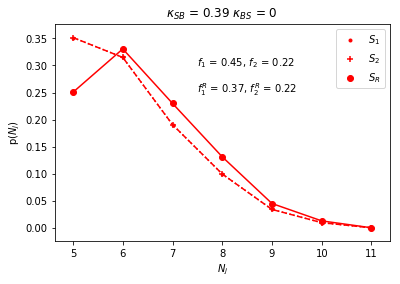

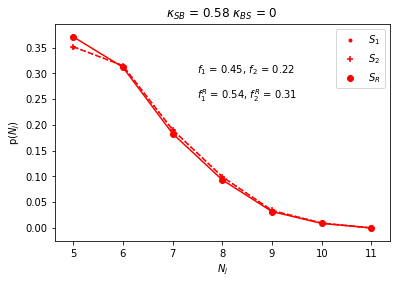

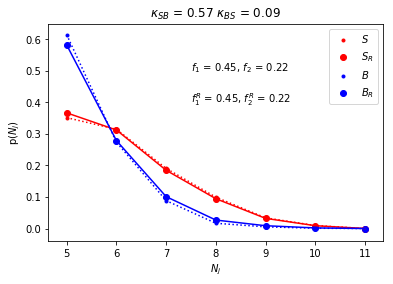

In [18]:
plt.text(7.5, 0.3, '$f_1$ = '+str(f1s)+', $f_2$ = '+ str(f2s))
plt.text(7.5, 0.25, '$f^{R}_1$ = '+str(f1r2)+', $f^{R}_2$ = '+ str(f2r2))
plt.scatter(binned[0],np.append(s0,0),marker='.',color='red',label='$S_1$')
plt.plot(binned[0],np.append(s0,0),color='red', linestyle=':')
plt.scatter(binned[0],np.append(s1,0),color='red', marker='+',label='$S_{2}$')
plt.plot(binned[0],np.append(s1,0),color='red', linestyle='--')
plt.scatter(binned[0],np.append(nK2,0),marker='o',color='red',label='$S_{R}$')
plt.plot(binned[0],np.append(nK2,0),color='red', linestyle='-')
plt.title('$\kappa_{SB}$ = '+str(round((1-f1)*0.5,2))+' $\kappa_{BS}$ = 0')
plt.xlabel('$N_{j}$')
plt.ylabel(r'p($N_{j}$)')
plt.legend(loc='upper right')
plt.show()

plt.text(7.5, 0.3, '$f_1$ = '+str(f1s)+', $f_2$ = '+ str(f2s))
plt.text(7.5, 0.25, '$f^{R}_1$ = '+str(f1r3)+', $f^{R}_2$ = '+ str(f2r3))
plt.scatter(binned[0],np.append(s0,0),marker='.',color='red',label='$S_1$')
plt.plot(binned[0],np.append(s0,0),color='red', linestyle=':')
plt.scatter(binned[0],np.append(s1,0),color='red', marker='+',label='$S_{2}$')
plt.plot(binned[0],np.append(s1,0),color='red', linestyle='--')
plt.scatter(binned[0],np.append(nK3,0),marker='o',color='red',label='$S_{R}$')
plt.plot(binned[0],np.append(nK3,0),color='red', linestyle='-')
plt.title('$\kappa_{SB}$ = '+str(round((1-f1)*0.75,2))+' $\kappa_{BS}$ = 0')
plt.xlabel('$N_{j}$')
plt.ylabel(r'p($N_{j}$)')
plt.legend(loc='upper right')
plt.show()

plt.text(7.5, 0.5, '$f_1$ = '+str(f1s)+', $f_2$ = '+ str(f2s))
plt.text(7.5, 0.4, '$f^{R}_1$ = '+str(f1rtruth)+', $f^{R}_2$ = '+ str(f2rtruth))
plt.scatter(binned[0],np.append(s0,0),marker='.',color='red',label='$S$')
plt.plot(binned[0],np.append(s0,0),color='red', linestyle=':')
plt.scatter(binned[0],np.append(nK1truth,0),marker='o',color='red',label='$S_{R}$')
plt.plot(binned[0],np.append(nK1truth,0),color='red', linestyle='-')
plt.scatter(binned[0],np.append(densitybackground1,0),color='blue',marker='.',label='$B$')
plt.plot(binned[0],np.append(densitybackground1,0),color='blue',linestyle=':')
plt.scatter(binned[0],np.append(nK2truth,0),marker='o',color='blue',label='$B_{R}$')
plt.plot(binned[0],np.append(nK2truth,0),color='blue', linestyle='-')
plt.title('$\kappa_{SB}$ = '+str(round(k12,2))+' $\kappa_{BS}$ = '+str(round(k21,2)))
plt.xlabel('$N_{j}$')
plt.ylabel(r'p($N_{j}$)')
plt.legend(loc='upper right')
plt.show()